In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
df_gamelog = pd.read_csv(r'C:\Users\stefa\Documents\GitHub\Fantasy-Football\FF_League_History.csv', encoding='utf-8')

In [108]:
df_gamelog.drop(['Week'],axis=1)

,history_week,year_week,playoff_note,postseason,two_week_flag,dupe_reverse,Year,Player,Player.1,P1,P2
0,1,1,0,0,0,0,2009,Stephen Joynt,Andrew Joynt,87,87
1,1,1,0,0,0,0,2009,mark silva,Karl Richardson,76,110
2,1,1,0,0,0,0,2009,Robert Hilton,Paulo Silva,43,108
3,1,1,0,0,0,0,2009,Dan Cohen,Stefan Hilts,60,104
4,1,1,0,0,0,0,2009,William Schager,chris tingle,108,109
5,1,1,0,0,0,1,2009,Andrew Joynt,Stephen Joynt,87,87
6,1,1,0,0,0,1,2009,Karl Richardson,mark silva,110,76
7,1,1,0,0,0,1,2009,Paulo Silva,Robert Hilton,108,43
8,1,1,0,0,0,1,2009,Stefan Hilts,Dan Cohen,104,60
9,1,1,0,0,0,1,2009,chris tingle,William Schager,109,108


In [132]:
df_gamelog['W'] = np.where(df_gamelog['P1']>df_gamelog['P2'], 1,0)
df_gamelog['L'] = np.where(df_gamelog['P1']<df_gamelog['P2'], 1,0)
df_gamelog['T'] = np.where(df_gamelog['P1']==df_gamelog['P2'], 1,0)
df_gamelog['cumul_w'] = df_gamelog.groupby('Player')['W'].cumsum()
df_gamelog['cumul_t'] = df_gamelog.groupby('Player')['T'].cumsum()
df_gamelog['cumul_l'] = df_gamelog.groupby('Player')['L'].cumsum()
df_gamelog['cumul_wp'] = df_gamelog['cumul_w']/(df_gamelog['cumul_w']+df_gamelog['cumul_l'])
df_gamelog['cumul_games'] = df_gamelog['cumul_w']  + df_gamelog['cumul_t'] + df_gamelog['cumul_l'] 

In [111]:
df_gamelog

,history_week,year_week,Week,playoff_note,postseason,two_week_flag,dupe_reverse,Year,Player,Player.1,P1,P2,W,L,T,cumul_w,cumul_t,cumul_l,cumul_wp
0,1,1,WEEK 1,0,0,0,0,2009,Stephen Joynt,Andrew Joynt,87,87,0,0,1,0,1,0,NaN
1,1,1,WEEK 1,0,0,0,0,2009,mark silva,Karl Richardson,76,110,0,1,0,0,0,1,0.000000
2,1,1,WEEK 1,0,0,0,0,2009,Robert Hilton,Paulo Silva,43,108,0,1,0,0,0,1,0.000000
3,1,1,WEEK 1,0,0,0,0,2009,Dan Cohen,Stefan Hilts,60,104,0,1,0,0,0,1,0.000000
4,1,1,WEEK 1,0,0,0,0,2009,William Schager,chris tingle,108,109,0,1,0,0,0,1,0.000000
5,1,1,WEEK 1,0,0,0,1,2009,Andrew Joynt,Stephen Joynt,87,87,0,0,1,0,1,0,NaN
6,1,1,WEEK 1,0,0,0,1,2009,Karl Richardson,mark silva,110,76,1,0,0,1,0,0,1.000000
7,1,1,WEEK 1,0,0,0,1,2009,Paulo Silva,Robert Hilton,108,43,1,0,0,1,0,0,1.000000
8,1,1,WEEK 1,0,0,0,1,2009,Stefan Hilts,Dan Cohen,104,60,1,0,0,1,0,0,1.000000
9,1,1,WEEK 1,0,0,0,1,2009,chris tingle,William Schager,109,108,1,0,0,1,0,0,1.000000


In [103]:
select_gamelog = df_gamelog.where(df_gamelog['Year']>=2009).dropna()
select_gamelog['early_late'] = np.where(select_gamelog['year_week']<11,'early','late')
#df_results = select_gamelog.groupby(['Player','Player.1']).agg('sum')
df_results = select_gamelog.groupby(['Player','early_late']).agg('sum')
df_results['wp'] = (df_results['W'] / (df_results['W'] + df_results['L'] )).round(3)
df_results['total_games'] = df_results['W']  + df_results['T'] + df_results['L'] 
df_results['Points_for_pg'] = (df_results['P1']/df_results['total_games']).round(1)
df_results['Points_against_pg'] = (df_results['P2']/df_results['total_games']).round(1)
df_results['pt_diff'] = df_results['Points_for_pg']-df_results['Points_against_pg']

pd.set_option('display.max_rows', 500)
df_results = df_results.iloc[:,6:]
df_results


P1    P2   W   L  T     wp  total_games  \
Player            early_late                                              
Andrew Joynt      early       8318  8332  48  40  2  0.545           90   
                  late        5678  5364  26  23  0  0.531           49   
Brian Duffy       early       3507  3910  13  25  2  0.342           40   
                  late        2357  2357   8  13  1  0.381           22   
Dan Cohen         early       7850  8259  43  47  0  0.478           90   
                  late        5502  5304  31  18  0  0.633           49   
Emile Chin-Dickey early       7007  7165  33  46  1  0.418           80   
                  late        4441  4830  16  27  0  0.372           43   
Greg Smith        early       1642  1772   8  11  1  0.421           20   
                  late         960  1077   6   6  0  0.500           12   
Karl Richardson   early       7942  8162  40  48  2  0.455           90   
                  late        4994  4974  26  20  1  0.565           47   
Paulo Silva       early       8321  7707  55  35  0  0.611           90   
                  late        5593  5575  21  26  2  0.447           49   
Rafesse           early       3512  3649  19  21  0  0.475           40   
                  late        1898  2159   7  15  1  0.318           23   
Robert Hilton     early       4473  4423  25  25  0  0.500           50   
                  late        2543  2586  12  16  0  0.429           28   
Stefan Hilts      early       8443  8000  55  35  0  0.611           90   
                  late        5516  5455  27  19  2  0.587           48   
Stephen Joynt     early       8148  7959  42  45  3  0.483           90   
                  late        5201  5161  21  27  1  0.438           49   
William Schager   early       8005  8211  38  50  2  0.432           90   
                  late        5210  5169  26  22  1  0.542           49   
chris tingle      early       2254  2758   8  22  0  0.267           30   
                  late        1608  1807   5  10  0  0.333           15   
mark silva        early       8593  7708  54  31  5  0.635           90   
                  late        5330  5013  27  17  3  0.614           47   

                              Points_for_pg  Points_against_pg  pt_diff  
Player            early_late                                             
Andrew Joynt      early                92.4               92.6     -0.2  
                  late                115.9              109.5      6.4  
Brian Duffy       early                87.7               97.8    -10.1  
                  late                107.1              107.1      0.0  
Dan Cohen         early                87.2               91.8     -4.6  
                  late                112.3              108.2      4.1  
Emile Chin-Dickey early                87.6               89.6     -2.0  
                  late                103.3              112.3     -9.0  
Greg Smith        early                82.1               88.6     -6.5  
                  late                 80.0               89.8     -9.8  
Karl Richardson   early                88.2               90.7     -2.5  
                  late                106.3              105.8      0.5  
Paulo Silva       early                92.5               85.6      6.9  
                  late                114.1              113.8      0.3  
Rafesse           early                87.8               91.2     -3.4  
                  late                 82.5               93.9    -11.4  
Robert Hilton     early                89.5               88.5      1.0  
                  late                 90.8               92.4     -1.6  
Stefan Hilts      early                93.8               88.9      4.9  
                  late                114.9              113.6      1.3  
Stephen Joynt     early                90.5               88.4      2.1  
                  late                106.1              105.3      0.8  
Willi

### Running total win percentage by player

In [162]:
player_list = df_gamelog.groupby('Player')['Player'].agg('count').index
df_cumul_wp = pd.DataFrame()

for player in player_list:
    player_iter = player
    df_temp = df_gamelog.where(df_gamelog['Player']==player_iter)[['cumul_wp','cumul_games']].dropna().set_index('cumul_games').sort_index()
    #df_temp = df_gamelog.where(df_gamelog['Player']==player_iter)[['cumul_wp']].dropna().sort_index()
    df_cumul_wp = df_cumul_wp.join(df_temp, how='outer', rsuffix=player)

df_cumul_wp

,cumul_wp,cumul_wpBrian Duffy,cumul_wpDan Cohen,cumul_wpEmile Chin-Dickey,cumul_wpGreg Smith,cumul_wpKarl Richardson,cumul_wpPaulo Silva,cumul_wpRafesse,cumul_wpRobert Hilton,cumul_wpStefan Hilts,cumul_wpStephen Joynt,cumul_wpWilliam Schager,cumul_wpchris tingle,cumul_wpmark silva
cumul_games,,,,,,,,,,,,,,
1.0,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,NaN,0.000000,1.000000,0.000000
2.0,0.000000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.000000,0.500000,0.500000,0.500000
3.0,0.500000,0.333333,0.666667,0.000000,0.500000,0.666667,0.666667,0.333333,0.333333,0.666667,0.500000,0.333333,0.333333,0.333333
4.0,0.333333,0.500000,0.500000,0.000000,0.666667,0.500000,0.750000,0.500000,0.250000,0.750000,0.666667,0.500000,0.250000,0.500000
5.0,0.250000,0.400000,0.600000,0.000000,0.750000,0.600000,0.600000,0.400000,0.200000,0.800000,0.500000,0.600000,0.200000,0.600000
6.0,0.200000,0.333333,0.666667,0.000000,0.600000,0.500000,0.500000,0.500000,0.333333,0.833333,0.600000,0.500000,0.166667,0.666667
7.0,0.166667,0.285714,0.714286,0.166667,0.500000,0.571429,0.571429,0.571429,0.428571,0.857143,0.500000,0.428571,0.142857,0.571429
8.0,0.285714,0.250000,0.625000,0.142857,0.571429,0.625000,0.625000,0.500000,0.500000,0.750000,0.428571,0.500000,0.125000,0.500000
9.0,0.250000,0.222222,0.666667,0.250000,0.500000,0.666667,0.666667,0.555556,0.444444,0.777778,0.375000,0.444444,0.222222,0.444444


AttributeError: module 'matplotlib.pyplot' has no attribute 'get_position'

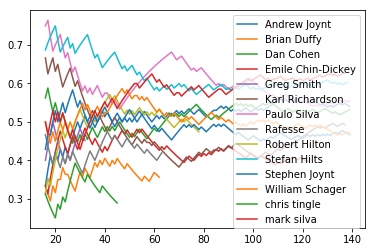

In [182]:
df_cumul_wp.columns = player_list
df_cumul_wp.iloc[15:]
lineObjects = plt.plot(df_cumul_wp.iloc[15:])
plt.legend(lineObjects, [x for x in player_list])
#plt.legend(loc='upper right')
box = plt.get_position()
plt.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(-2.5, -1.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()




